
# REPORTE 8

**Nombre**: Alessandra Marcela Marocho Pacheco 

**Código**: 20201319 


### **LECTURA**

El artículo desarrollado por Dell se concentra en el análisis sobre el impacto que tuvo la mita dentro de las sociedades peruanas en las que se desarrolló durante 1573 y 1812. De acuerdo con la investigación realizada, esta forma de trabajo forzada tuvo distintos efectos principalmente sobre aspectos económicos, y han condicionado la calidad de vida de las personas pertenecientes a estas comunidades en la actualidad. Por ejemplo, la prevalencia de una agricultura de subsistencia o la presencia de estas comunidades en los mercados es evaluada entre aquellos distritos dónde funciono la mita. En base de estudios sobre la influencia de instituciones extractivas históricas sobre la prosperidad económica, el trabajo evalúa si este sistema puede explicar los estándares de vida de estas zonas, a pesar de haber finalizado hace más de 200 años.

 

Entre las fortalezas del trabajo, podemos identificar la manera en los datos de la ENAHO y del censo del MINEDU son analizados dentro de las zonas de estudio de la mita y, cómo se utilizan en la aproximación de regresión discontinua. Por medio de su aplicación, la autora señala cómo la mita produce un efecto sobre el consumo doméstico. Se evidencia cómo, debido a la mita, esta muestra una disminución de 25 puntos porcentuales en la actualidad. Por su parte, el retraso en el crecimiento infantil también logra ser analizado, dando como resultado un incremento en 6 puntos porcentuales. Asimismo, el empleo de los canales de persistencia para demostrar los efectos en la tenencia de tierra, los bienes públicos y la participación en el mercado termina siendo ilustrativo. En primer lugar, logra demostrar cómo el acceso a las tierras entre aquellas zonas que formaron parte de la mita y no es diferenciado. Esto logra ser explicado por la falta de titulación sobre las tierras por parte del Estado, luego de haber abolido tal sistema. Igualmente, los años de educación también presentan un efecto negativo de 0.2 años en las zonas dentro del área de estudio, y la construcción de carreteras regionales, con una disminución de las mismas.  

 

Frente a ello, la principal contribución de esta investigación se concentra en la articulación de las variables previamente mencionadas para demostrar el efecto que puede presentar una institución histórica sobre una región.  Gracias a los resultados obtenidos, la autora nos permite reafirmar la teoría previamente mencionada y comprender cómo ciertas regiones cuentan con más limitaciones para ser prósperas económicamente. El desarrollo de la mita presenta hasta la actualidad consecuencias que agravan la calidad de vida de estas comunidades, tales como su participación en el mercado, el desarrollo de las poblaciones más jóvenes y su nivel de educación. De igual manera, la inclusión de estas zonas en la actualidad resulta ser más complicada que los distritos aledaños, puesto que la ausencia de infraestructura vial determina que vivan en zonas poco accesibles. Finalmente, también nos permite comprender la desigualdad del acceso a la tierra, y cómo esta fue determinada por aquellas clases terratenientes con influencia sobre el Estado.

##**CÓDIGO**
### **Instrumental Variables**

**El supuesto de Relevance**

De acuerdo con el supuesto de Relevancia, se espera que, al usar variables instrumentales, (X) el tratamiento sea explicado por el instrumento (Z). 

**El supuesto de Validity**

De acuerdo con el supuesto de validez, se espera que el camino entre el resultado Y y el instrumento Z siempre pase por el tratamiento X. Debido a ello, se espera que el resto de las puertas se mantengan cerradas. 

### **Ploteo de Histogramas**




In [12]:
pip install linearmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 4.9 MB/s 
     |████████████████████████████████| 77 kB 5.4 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.1.5 requires typing-extensions<4.2.0,>=3.7.4.1; python_version < "3.8", but you have typing-extensions 4.4.0 which is incompatible.
spacy 3.4.2 requires typing-extensions<4.2.0,>=3.7.4; python_version < "3.8", but you have typing-extensions 4.4.0 which is incompatible.
confection 0.0.3 requires typing-extensions<4.2.0,>=3.7.4.1; python_version < "3.8", but you have typing-extensions 4.4.0 which is incompat

In [14]:
import os
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from itertools import combinations 
import plotnine as p
import statsmodels.api as sm
import statsmodels.formula.api as smf
import linearmodels.iv.model as lm
from linearmodels.iv import IV2SLS
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns

In [15]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

def read_data(file): 
    return pd.read_stata("https://raw.github.com/scunning1975/mixtape/master/" + file)

card = read_data("card.dta")
card.head()

,id,nearc2,nearc4,educ,age,fatheduc,motheduc,weight,momdad14,sinmom14,...,KWW,IQ,married,libcrd14,exper,lwage,expersq,u_lwage,lwage_hat,u_educ
0,2.0,0.0,0.0,7.0,29.0,NaN,NaN,158413.0,1.0,0.0,...,15.0,NaN,1.0,0.0,16.0,6.306275,256.0,0.198047,6.108228,-3.067539
1,3.0,0.0,0.0,12.0,27.0,8.0,8.0,380166.0,1.0,0.0,...,35.0,93.0,1.0,1.0,9.0,6.175867,81.0,-0.211160,6.387027,-1.727562
2,4.0,0.0,0.0,12.0,34.0,14.0,12.0,367470.0,1.0,0.0,...,42.0,103.0,1.0,1.0,16.0,6.580639,256.0,0.204719,6.375920,1.012975
3,5.0,1.0,1.0,11.0,27.0,11.0,12.0,380166.0,1.0,0.0,...,25.0,88.0,1.0,1.0,10.0,5.521461,100.0,-0.967905,6.489366,-2.253536
4,6.0,1.0,1.0,12.0,34.0,8.0,7.0,367470.0,1.0,0.0,...,34.0,108.0,1.0,0.0,16.0,6.591674,256.0,0.125173,6.466501,1.090437


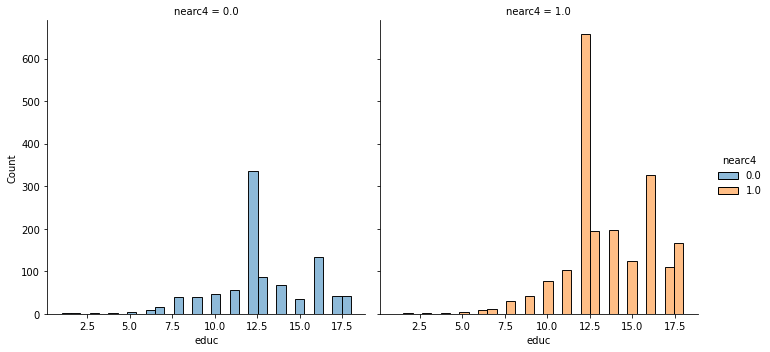

In [18]:
sns.displot(card, x="educ",col="nearc4", hue = "nearc4")

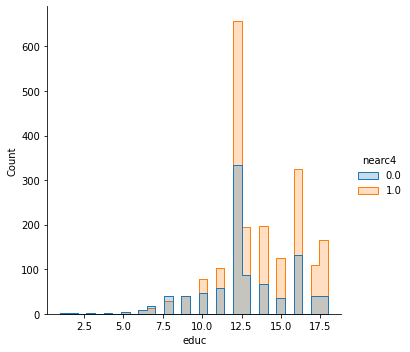

In [24]:
sns.displot(card, x="educ", hue = "nearc4", element="step")

**INTERPRETACIÓN:**

Por medio del presente histograma podemos distinguir que, ante la presencia de un college, los años que una persona puede dedicar a la educación se incrementan. Hasta los 10 años de educación hay una cantidad similar de observaciones para cuando la variable nearc4 es igual a 0 o 1. 

Sin embargo, al llegar a los 12.5 años de educación, el tiempo dedicado a la educación puede ser influenciado porque la variable nearc4 sea igual a 1. Vemos una mayor concentración de datos en esta medida y, posteriormente, mantendrá esa superioridad de datos frente a los casos que representan la ausencia de un college. 

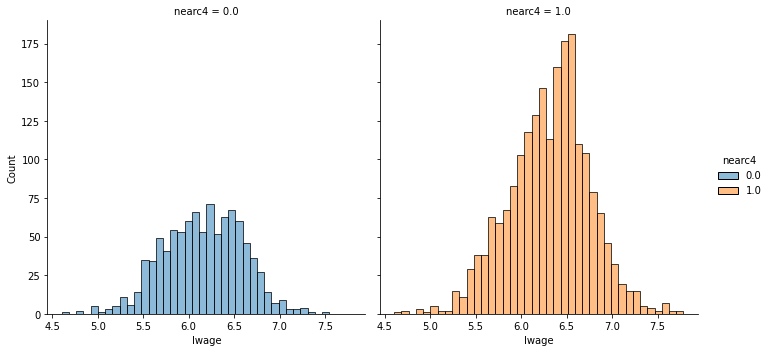

In [19]:
sns.displot(card, x="lwage",col="nearc4", hue = "nearc4")

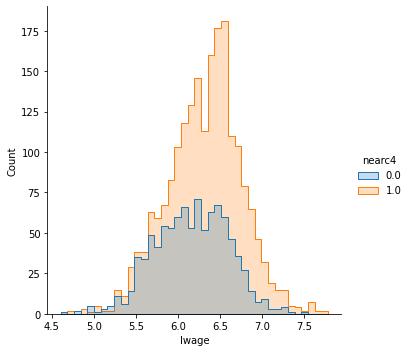

In [25]:
sns.displot(card, x="lwage", hue = "nearc4", element="step")

**INTERPRETACIÓN**

Por medio del presente gráfico, podemos notar que la presencia de un college cerca puede tiene relación en que un mayor número de encuestados tendrán ingresos elevados. Los datos de la variable nearc4 == 1 se encuentran mayoritariamente entre 6.5 y 7. Es posible notar la diferencia frente a aquellos que componen la variable nearc4 == 0 en cantidad, puesto que son una menor proporción. 

Además, se puede distinguir un mayor grado de dispersión entre aquellos que conforman la variable nearc4 igual 1, mientras que para aquellos que no había un college cerca, los datos no presentan tanta diferencia. 

###**Regresiones**

In [20]:
ols_reg = sm.OLS.from_formula("lwage ~ educ + exper + black + south + married + smsa", 
              data = card).fit()

ols_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     219.2
Date:                Sun, 13 Nov 2022   Prob (F-statistic):          1.97e-232
Time:                        19:07:01   Log-Likelihood:                -1273.9
No. Observations:                3003   AIC:                             2562.
Df Residuals:                    2996   BIC:                             2604.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0633      0.064     79.437      0.000       4.938       5.188
educ           0.0712      0.003     20.438      0.000       0.064       0.078
exper          0.0342      0.002     15.422      0.000       0.030       0.038
black         -0.1660      0.018     -9.426      0.000      -0.201      -0.131
south         -0.1316      0.015     -8.788      0.000      -0.161      -0.102
married       -0.0359      0.003    -10.547      0.000      -0.043      -0.029
smsa           0.1758      0.015     11.372      0.000       0.145       0.206
==============================================================================
Omnibus:                       53.196   Durbin-Watson:                   1.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.430
Skew:                          -0.231   Prob(JB):                     8.38e-16
Kurtosis:                       3.584   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

En primer lugar, si observamos el F - estadístico podemos determinar que el modelo propuesto es válido. De acuerdo con el R ajustado, cuenta con un 30.4% de predictibilidad. Asimismo, el p - value de cada una de las variables nos indica que aportan al modelo, puesto que no son superiores a 0.05. 

Podemos distinguir que, por ejemplo, por cada año más de educación los ingresos se incrementan en 7.12%. Asimismo, podemos ver que la variable married tiene un efecto inverso -3.59% sobre la variable dependiente. 

In [22]:
card['married'] = card['married'].fillna(0)

In [23]:
iv_reg = IV2SLS.from_formula( "lwage ~ 1 + exper + black + south + married + smsa + [educ ~ nearc4 ]", card).fit()
iv_reg.summary

<class 'linearmodels.compat.statsmodels.Summary'>
"""
                          IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:                  lwage   R-squared:                      0.2428
Estimator:                    IV-2SLS   Adj. R-squared:                 0.2413
No. Observations:                3010   F-statistic:                    884.54
Date:                Sun, Nov 13 2022   P-value (F-stat)                0.0000
Time:                        19:08:58   Distribution:                  chi2(6)
Cov. Estimator:                robust                                         
                                                                              
                             Parameter Estimates                              
==============================================================================
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      4.0998     0.8209     4.9942     0.0000      2.4909      5.7088
black         -0.1110     0.0493    -2.2504     0.0244     -0.2076     -0.0143
exper          0.0571     0.0195     2.9262     0.0034      0.0189      0.0953
married       -0.0318     0.0050    -6.3846     0.0000     -0.0415     -0.0220
smsa           0.1448     0.0302     4.8025     0.0000      0.0857      0.2039
south         -0.1128     0.0228    -4.9550     0.0000     -0.1574     -0.0682
educ           0.1279     0.0484     2.6438     0.0082      0.0331      0.2227
==============================================================================

Endogenous: educ
Instruments: nearc4
Robust Covariance (Heteroskedastic)
Debiased: False
"""

Al instrumentalizar la variable de años de educación con la variable nearc4, podemos notar que con cada año adicional de educación, el salario se incrementa en 12.7 puntos porcentuales. 

Presenta una diferencia frente al resultado obtenido en el anterior modelo para edu, que era igual 7.12 puntos porcentuales. Esta diferencia puede ser entendida por medio de una reducción de sesgos
